# Walmart Sales Analysis

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores in the United States, headquartered in Bentonville, Arkansas.

### INTRODUCTION

This project conducts an in-depth analysis of retail sales data, specifically focusing on Walmart store performance across different locations. Using Python for data exploration and visualization, I aim to uncover insights into sales trends, seasonal variations, and the influence of external factors like holidays, temperature, fuel prices, CPI, and unemployment rates. Through this analysis, I aim to provide actionable insights for retail management decision-making and enhance understanding of consumer behavior and market dynamics.


Summary of the Dataset:

Store: Identifier for the retail store.

Date: Date of sales record.

Holiday_Flag: Indicator for holiday week (1) or non-holiday week (0).

Temperature: Temperature in the region of the store.

Fuel_Price: Fuel price in the region.

CPI: Consumer Price Index.

Unemployment: Unemployment rate.



In [1]:
# Installing select libraries:-
from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use("fivethirtyeight")

from datetime import datetime  
from scipy import stats
filterwarnings('ignore'); # Ignore warning messages
from IPython.display import display_html, clear_output; # displaying HTML content


clear_output();
print();
collect();

In [2]:
df = pd.read_csv("Walmart_sales.csv")

In [3]:
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [4]:
df.tail(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
df.shape

(6435, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
df.count()

Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
dtype: int64

In [10]:
# Rename columns to lowercase
df.columns = df.columns.str.lower()

In [11]:
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [12]:
# Calculating null values 
# Rename columns to lowercase
df.isna().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [13]:
# Attempt to convert 'date' column to datetime format
try:
    df['date'] = pd.to_datetime(df['date'], format='mixed')
    print("All values in 'date' column are valid dates.")
except ValueError as e:
    print("Error:", e)
    print("There are non-date values present in the 'date' column.")

Error: time data '05-02-2010' does not match format 'mixed' (match)
There are non-date values present in the 'date' column.


In [14]:
# Checking the duplicate values in the data
duplicate_values=df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


In [15]:
# Statistics about the data set
df.describe().style.background_gradient(cmap='bone_r')

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000


In [16]:
print(df["date"].dtype)


object


In [17]:
df["date"] = pd.to_datetime(df["date"], format='%d-%m-%Y')


In [18]:
df["date"] = pd.to_datetime(df["date"], format='%d-%m-%Y', errors='coerce')


In [19]:
def date_to_season(date):
    if pd.isnull(date):
        return "Invalid"  # or return None
    month = date.month
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"

    

In [20]:
# Ensure that the 'date' column is in datetime format
df["date"] = pd.to_datetime(df["date"], format='%d-%m-%Y', errors='coerce')

# Apply the date_to_season function to the 'date' column
df["season"] = df["date"].apply(date_to_season)



In [21]:
df["season"]

0       Winter
1       Winter
2       Winter
3       Winter
4       Spring
         ...  
6430    Autumn
6431    Autumn
6432    Autumn
6433    Autumn
6434    Autumn
Name: season, Length: 6435, dtype: object

In [22]:
# Extract year from the 'date' column
df['year'] = df['date'].dt.year

# Extract month from the 'date' column
df['month'] = df['date'].dt.month

# Extract month name from the 'date' column
df['month_name'] = df['date'].dt.month_name()

# Extract day from the 'date' column
df['day'] = df['date'].dt.day

# Extract day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday) from the 'date' column
df['day_of_week'] = df['date'].dt.dayofweek

df.sample(5)


,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,season,year,month,month_name,day,day_of_week
4413,31,2012-06-15,1431003.43,0,81.51,3.393,221.400990,6.891,Summer,2012,6,June,15,4
5952,42,2011-10-21,537276.41,0,77.91,3.842,129.782161,7.874,Autumn,2011,10,October,21,4
1630,12,2011-03-11,997672.62,0,57.75,3.818,128.399500,14.021,Spring,2011,3,March,11,4
5460,39,2010-08-06,1409989.67,0,84.92,2.627,210.261493,8.360,Summer,2010,8,August,6,4
869,7,2010-04-23,404751.25,0,43.07,2.776,189.619006,8.963,Spring,2010,4,April,23,4


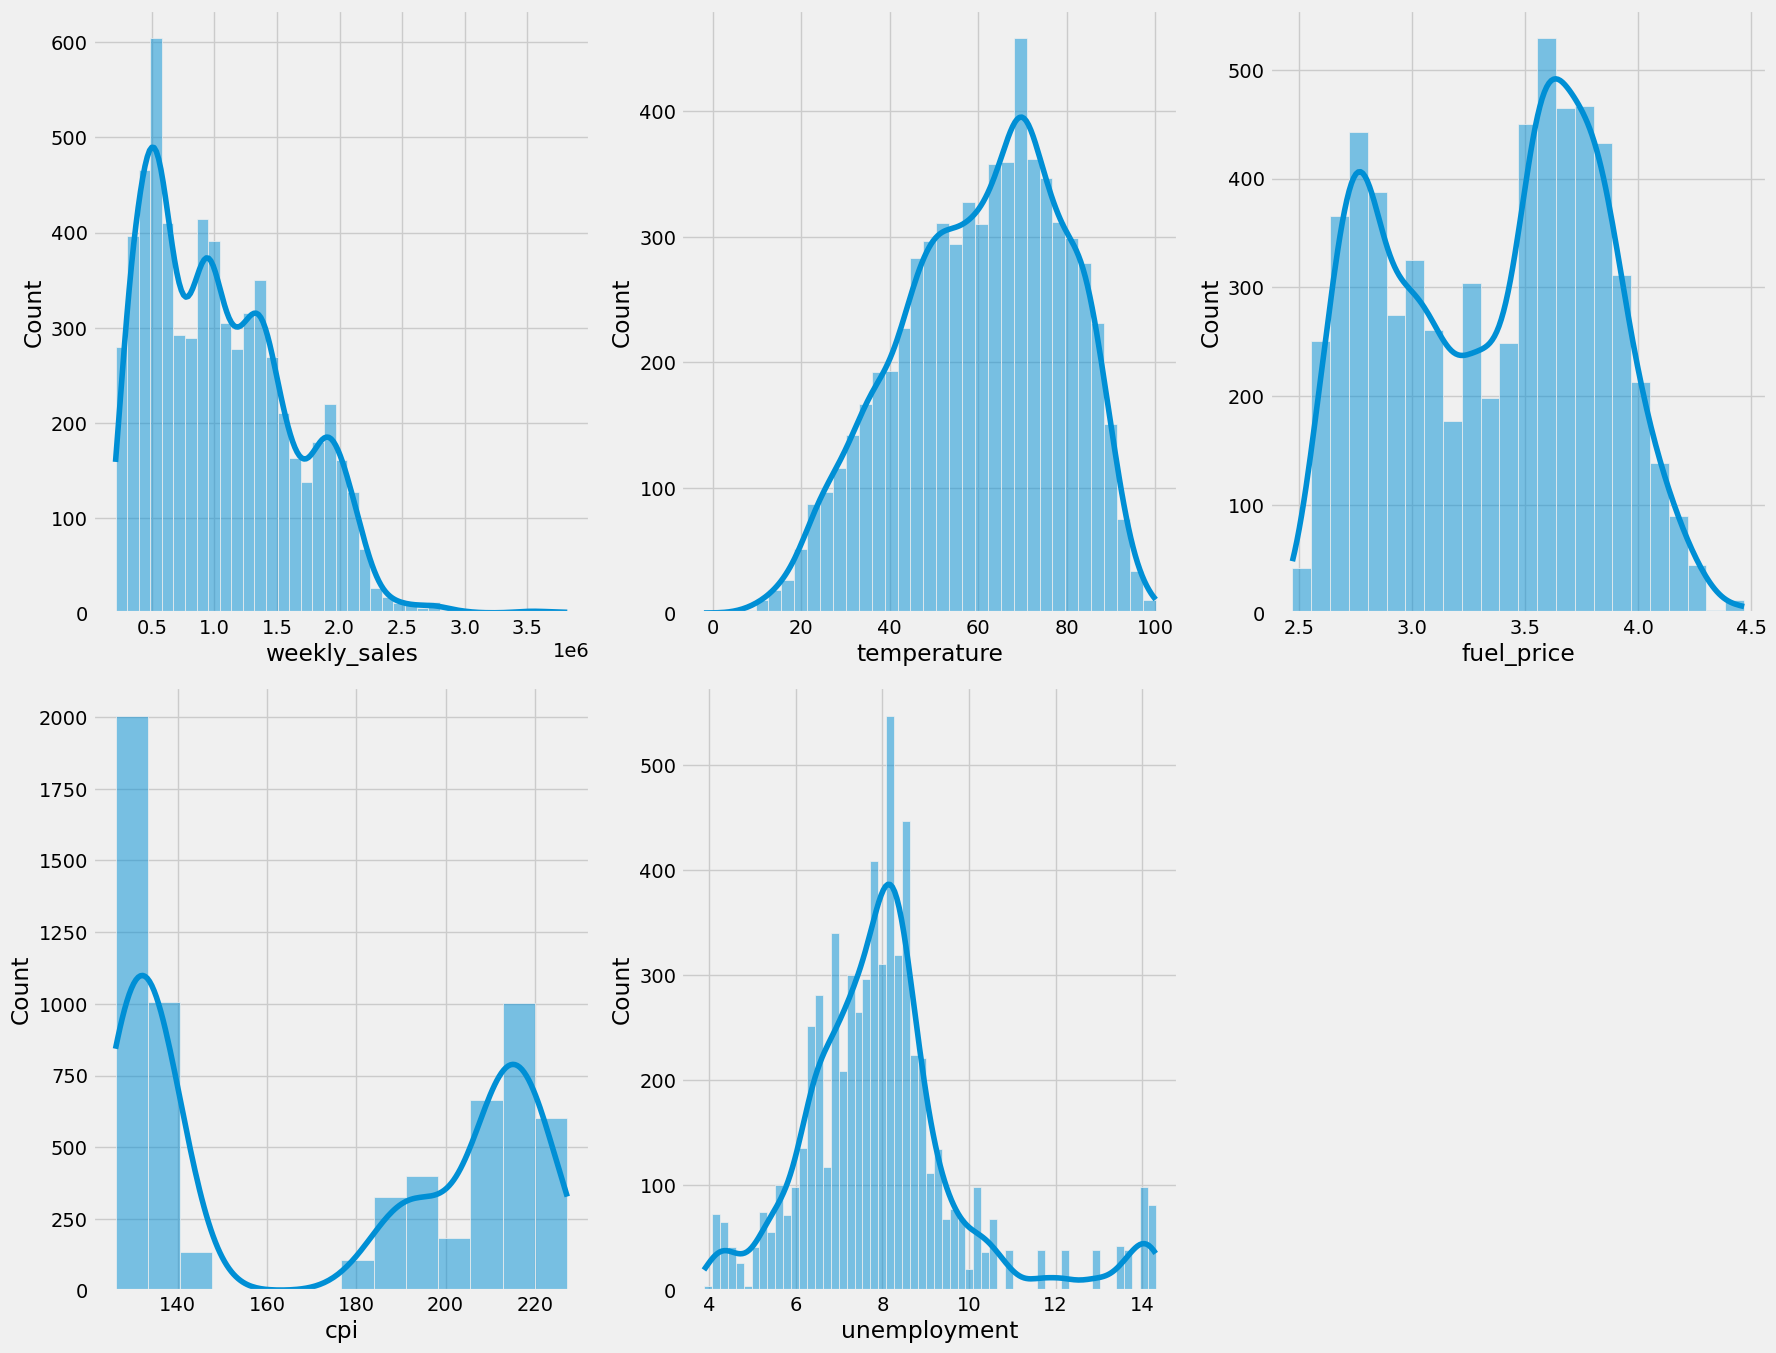

In [23]:
# List of features
features = ['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']

# Set the figure size
plt.figure(figsize=(18, 20))

# Loop through each column in your dataset
for i, col in enumerate(features):
    # Create subplots
    plt.subplot(3, 3, i+1)
    
    # Plot histogram for the current column
    sns.histplot(data=df, x=col, kde=True)

plt.tight_layout()
plt.show()

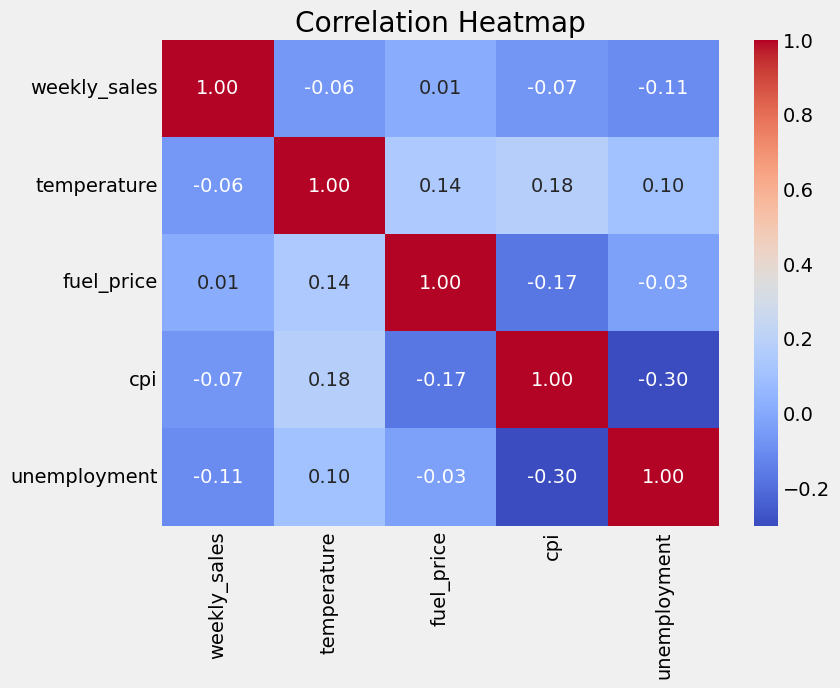

In [24]:
correlation_matrix = df[['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [25]:
pd.pivot_table(data = df,
              index = 'year',
              columns = 'season',
              values = 'weekly_sales',
              aggfunc = 'sum')

season,Autumn,Spring,Summer,Winter
year,,,,
2010,5.972831e+08,6.000431e+08,6.124664e+08,4.790935e+08
2011,6.142714e+08,5.875311e+08,6.082841e+08,6.381134e+08
2012,3.650072e+08,6.091970e+08,6.649705e+08,3.609581e+08


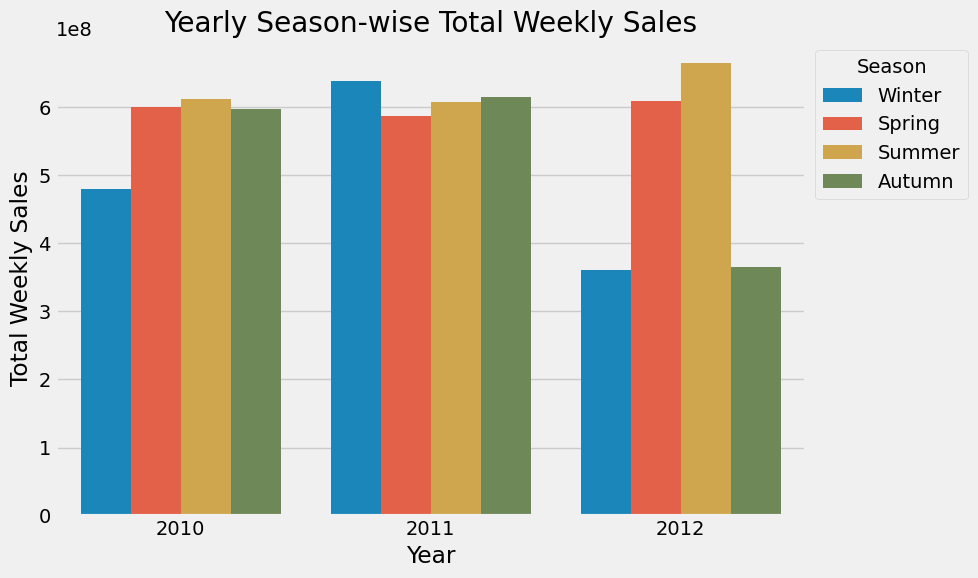

In [26]:
# Create a dictionary to store season-wise weekly sales for each year
seasonwise_weekly_sales = {}

# Iterate over unique seasons
for season in df['season'].unique():
    # Group by year and sum the weekly sales for the current season
    season_sales = df[df['season'] == season].groupby('year')['weekly_sales'].sum()
    # Store the season-wise weekly sales in the dictionary
    seasonwise_weekly_sales[season] = season_sales

# Create an empty list to store data
plot_data = []

# Populate the list with data
for season, sales in seasonwise_weekly_sales.items():
    for year, weekly_sales in sales.items():
        plot_data.append({'Year': year, 'Season': season, 'Weekly Sales': weekly_sales})

# Convert the list to a DataFrame
plot_data = pd.DataFrame(plot_data)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bar plot using seaborn
sns.barplot(data=plot_data, x='Year', y='Weekly Sales', hue='Season', ax=ax, ci=None)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total Weekly Sales')
ax.set_title('Yearly Season-wise Total Weekly Sales')
# Adjust legend position to prevent it from going outside the plot
ax.legend(title='Season', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

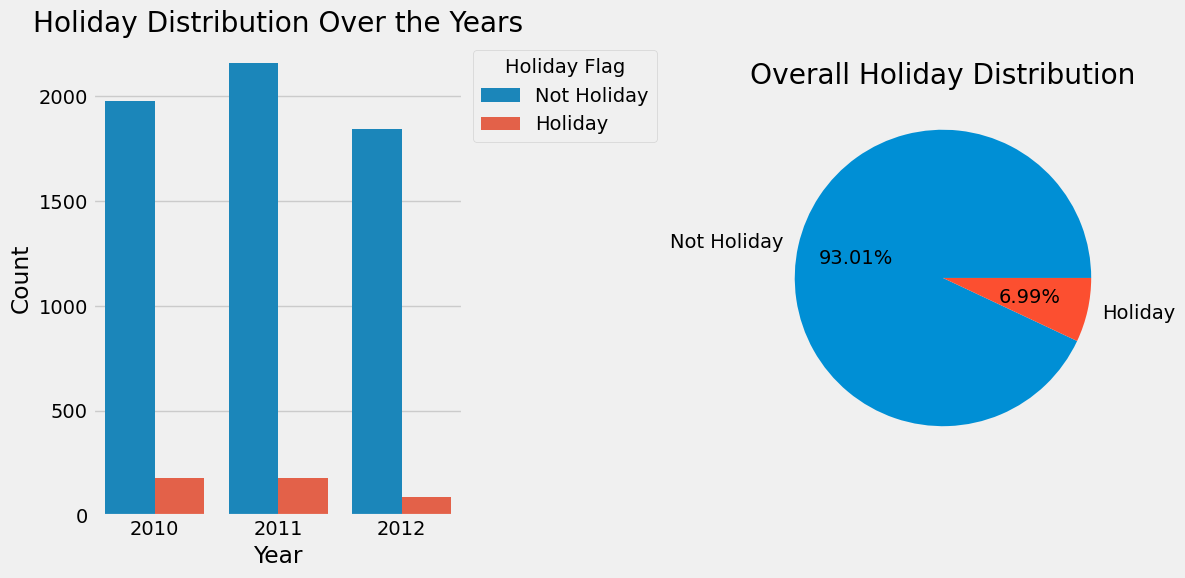

In [27]:
# Group by year and holiday_flag to get counts
holiday_counts = df.groupby(['year', 'holiday_flag']).size().unstack(fill_value=0).reset_index()

# Melt DataFrame to long format
holiday_counts_melted = pd.melt(holiday_counts, id_vars='year', var_name='Holiday Flag', value_name='Count')

# Plot using Seaborn
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot
sns.barplot(data=holiday_counts_melted, x='year', y='Count', hue='Holiday Flag', ax=ax[0])
ax[0].set_title('Holiday Distribution Over the Years')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')

# Get legend handles
handles, _ = ax[0].get_legend_handles_labels()

ax[0].legend(handles=handles, labels=['Not Holiday', 'Holiday'], title='Holiday Flag', loc='upper left', bbox_to_anchor=(1, 1))

ax[1].pie(df['holiday_flag'].value_counts().values, labels=['Not Holiday', 'Holiday'], autopct='%1.2f%%')
ax[1].set_title('Overall Holiday Distribution')

plt.tight_layout()
plt.show()

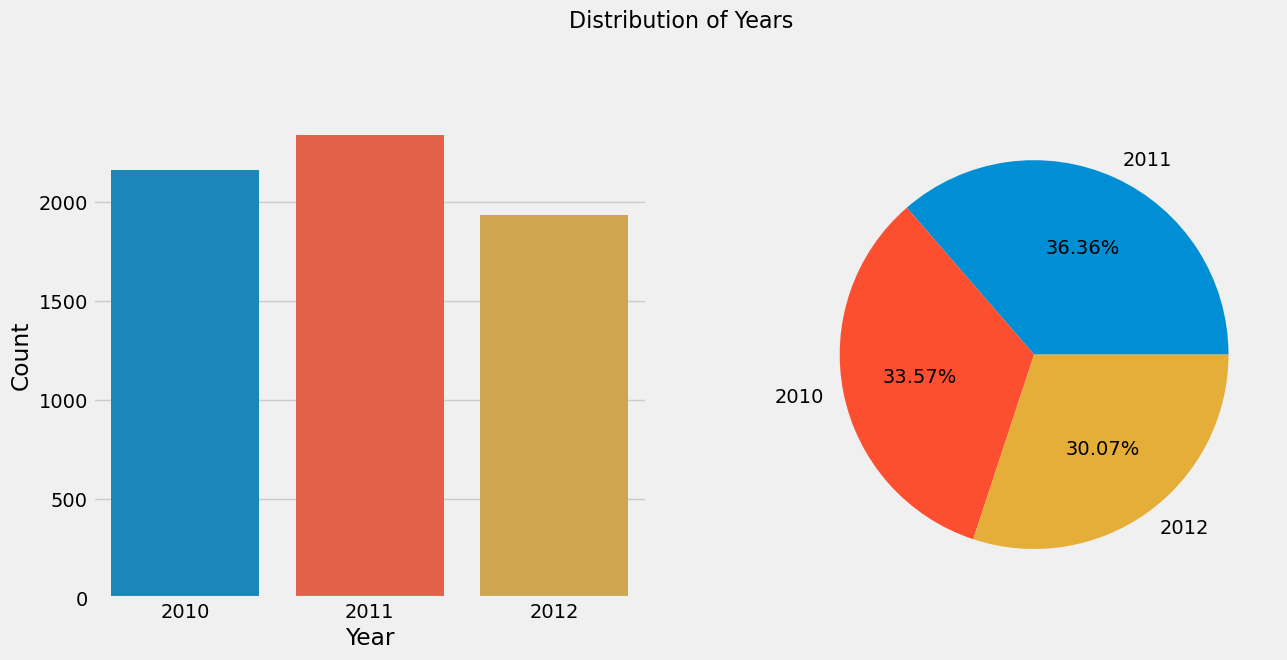

In [28]:
# Calculate the count of each year
year_counts = df['year'].value_counts()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Countplot for the distribution of years
sns.countplot(data=df, x='year', ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')

# Pie chart for the distribution of years
ax[1].pie(year_counts.values, labels=year_counts.index, autopct='%1.2f%%')

# Set a single title for the entire figure
plt.suptitle('Distribution of Years', fontsize=16, y=1.05)

plt.show()